## Importing important Libraries

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Data Set

In [ ]:
df = pd.read_csv("/content/Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.duplicated().sum()  # CHECKING FOR DUPLICATES

np.int64(0)

In [ ]:
df.isna().sum() # CHECKING FOR NULL VALUES

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Split Features and Target Variable for Modeling

In [ ]:
X = df.drop('price', axis=1)  # features
y = df['price']               # target


## Converting non-numerical values to numeric ( ENCODING)

In [ ]:
# Automatically convert all non-numeric columns into numeric ones
X_encoded = pd.get_dummies(X, drop_first=True)


## CO Relation among all features

In [ ]:
X_encoded.corr()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.053179,-0.094086


## Corelation Matrix


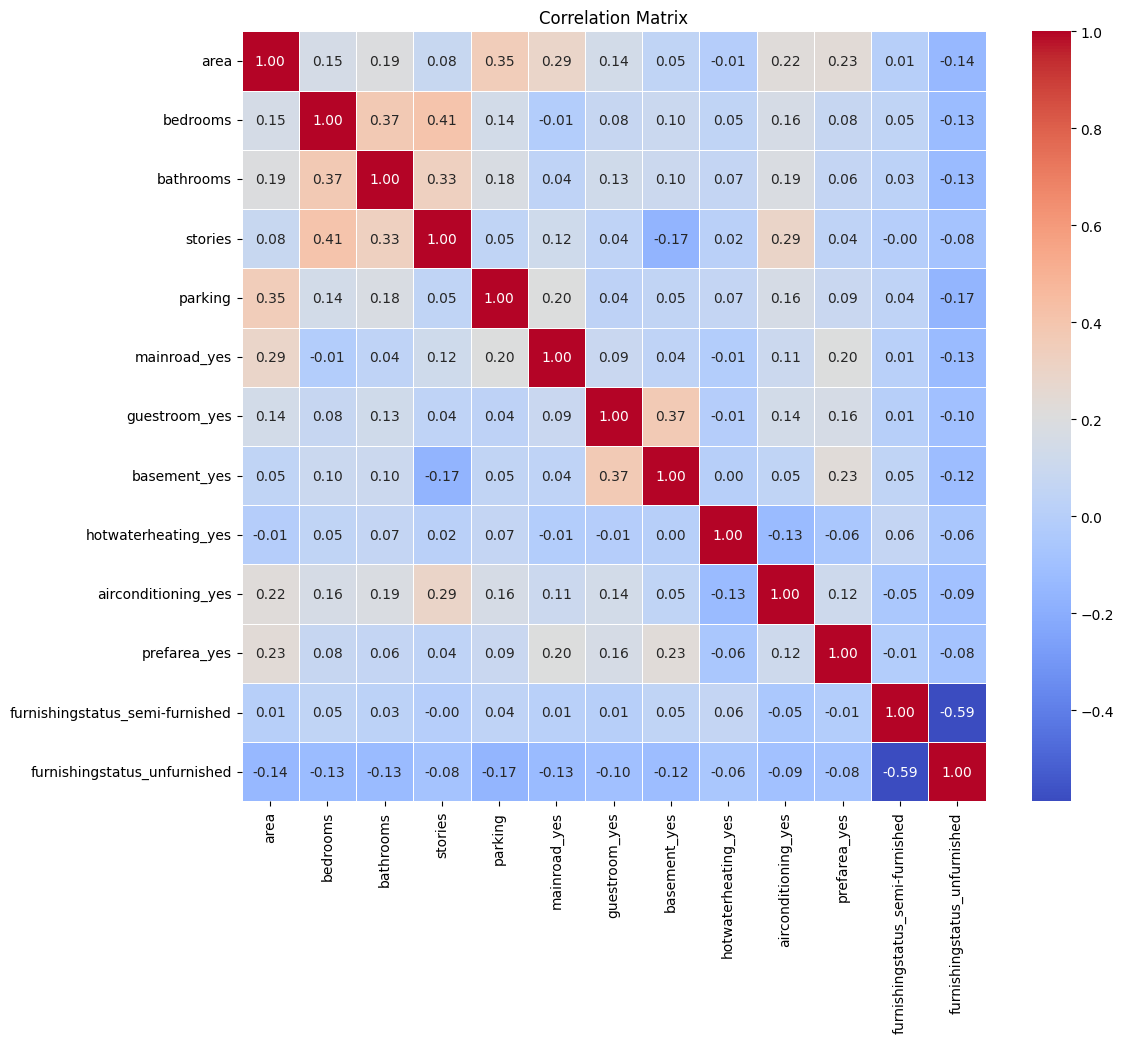

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_encoded.corr()


# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Visualize Numeric Features Against Price with Scatter Plots

Each plot shows how price varies with the respective feature, helping to identify trends, correlations, or outliers (e.g., larger area might correlate with higher price).

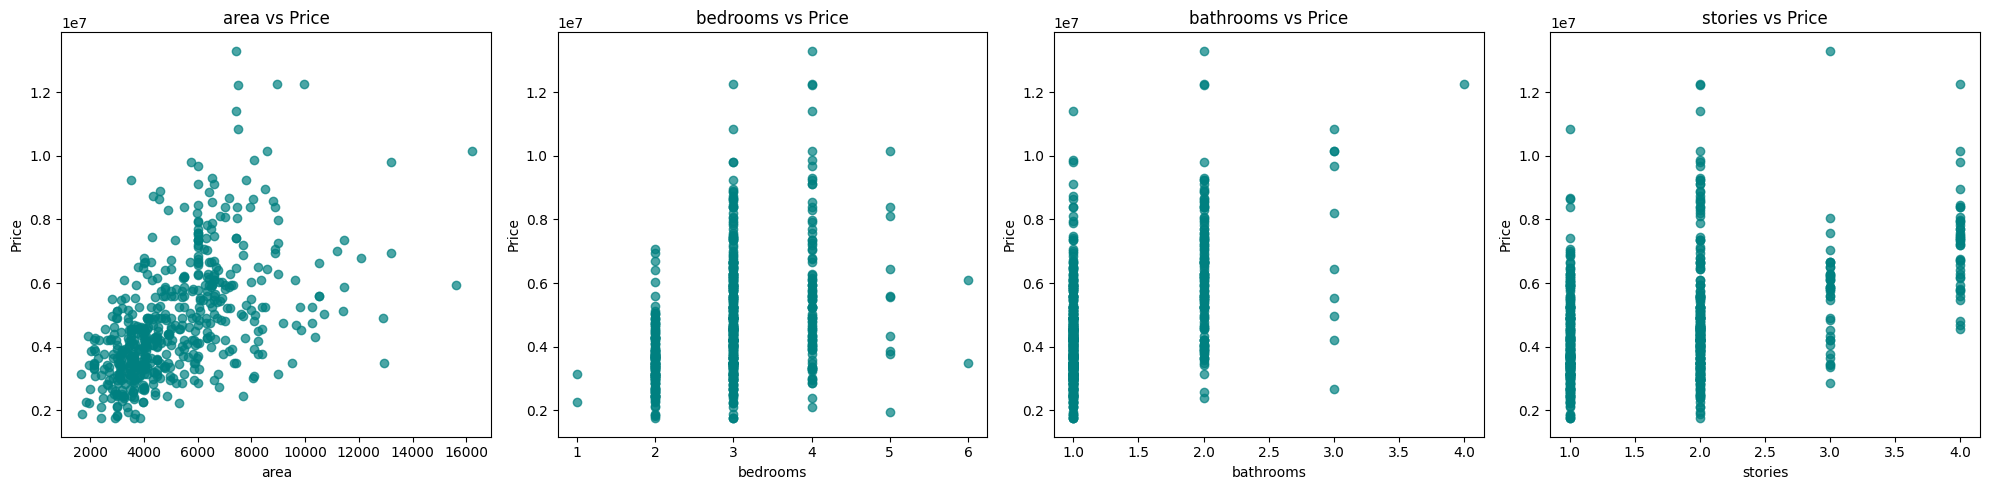

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))  # Wide layout

# Choose numeric features to visualize against price
features = ['area', 'bedrooms', 'bathrooms', 'stories']
target = df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o', alpha=0.7, color='teal')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


## Splitting into train and test data using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Selecting the features and target variable

X = df.drop('price', axis=1)  # features
y = df['price']               # target

#encoding non-numerical Values

X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


## Box Plot for Outliers

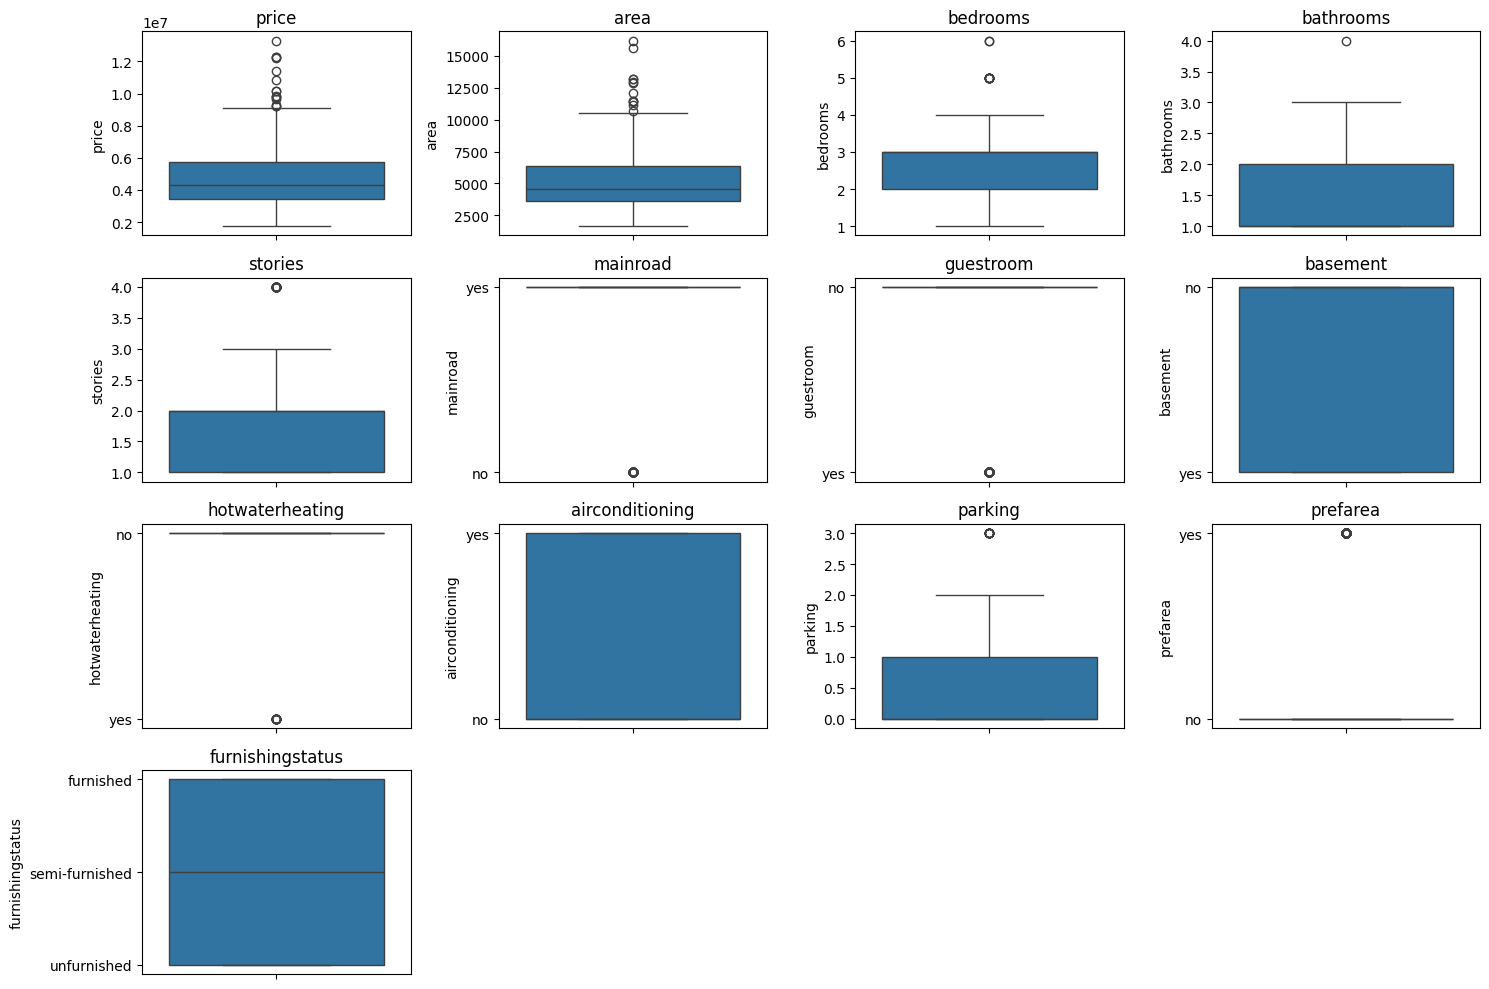

In [ ]:
# Boxplots to visualize outliers in the dataset
plt.figure(figsize=(15, 10))

# Creating a boxplot for each feature in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

## Visual summary of the distribution of all numerical columns

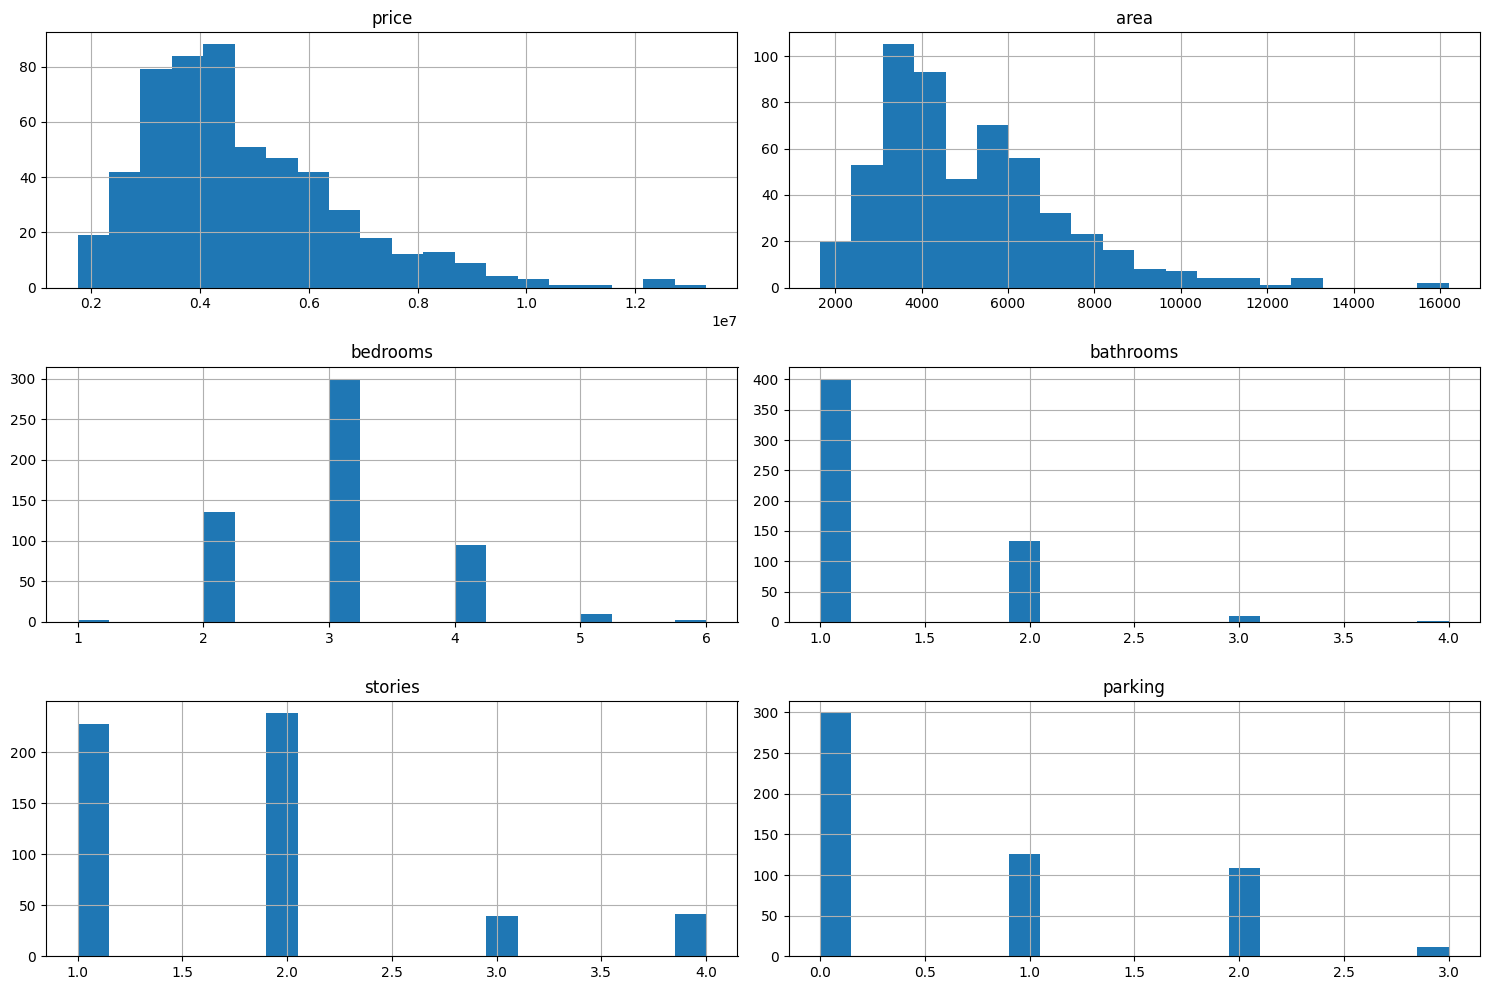

In [ ]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

## Checking null values if any

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Evaluate Linear Regression Model Performance and Predict on Test Data


This code segment uses the scikit-learn library to evaluate the performance of a trained Linear Regression model and generate predictions on test data. It calculates key metrics—Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score—to assess how well the model predicts the target variable. Additionally, it demonstrates predicting outcomes on a test dataset (X_test) using the trained model, providing a practical application of the model’s capabilities.




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Predict outcomes on the test dataset using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance using various metrics
mae = mean_absolute_error(y_test, y_pred)  # MAE: Mean Absolute Error - Average of absolute differences between predicted and actual values, measuring average prediction error
mse = mean_squared_error(y_test, y_pred)   # MSE: Mean Squared Error - Average of squared differences, penalizing larger errors more, useful for emphasizing outliers
rmse = np.sqrt(mse)                        # RMSE: Root Mean Squared Error - Square root of MSE, providing error in the same units as the target variable, easier to interpret
r2 = r2_score(y_test, y_pred)              # R² Score: Coefficient of Determination - Proportion of variance in the target explained by the model (1 is perfect fit, 0 is no better than mean)

# Print the evaluation metrics with two decimal places for readability
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Predict on the test data again (note: this is a duplicate line, likely intended for a different dataset or demonstration)
y_pred = model.predict(X_test)

MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R² Score: 0.65


# Prediction by Random House Data


In [ ]:

# Prediction on data provided by myslef.

sample = {
    'area': 7420,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 3,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 2,
    'prefarea': 'yes',
    'furnishingstatus': 'furnished'
}

import pandas as pd

# Convert to DataFrame
sample_df = pd.DataFrame([sample])

# Map binary yes/no to 1/0
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    sample_df[col] = sample_df[col].map({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
sample_df = pd.get_dummies(sample_df, columns=['furnishingstatus'], drop_first=True)

# Align columns with training set
sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)


predicted_price = model.predict(sample_df)[0]
print(f"Predicted Price: {predicted_price:.2f}")



Predicted Price: 6179038.88
